In [1]:
import csv
import keras
import pandas
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate, BatchNormalization, Conv1D, Conv2D, Flatten, MaxPooling1D
from keras import optimizers
import numpy as np
import tensorflow as tf
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [19]:
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv'
df = pandas.read_csv(url)
inputs = df['cases'].to_numpy()             
outputs = df['deaths'].to_numpy()
df.tail(5)

,date,cases,deaths
228,2020-09-05,6260993,188409
229,2020-09-06,6292054,188815
230,2020-09-07,6317221,189076
231,2020-09-08,6345771,189538
232,2020-09-09,6378972,190714


In [20]:
past = 5
s = (len(inputs) , past  * 2)
betterinputs = np.zeros(s)
betteroutputs = np.zeros(len(inputs))

for i in range(len(inputs) - past):
  temp = np.zeros(past * 2)
  temp[0 : past] = inputs[i : i+ past]
  temp[past:] = outputs[i : i + past] 
  betterinputs[i] = temp
  betteroutputs[i] = inputs[i+past]

In [21]:
betterinputs = betterinputs[0:len(df) - past] 
betteroutputs = betteroutputs[0:len(df) - past]
print(betterinputs[0])

[1. 1. 1. 2. 3. 0. 0. 0. 0. 0.]


In [22]:
split = int(0.85*len(betterinputs))
X_train, X_test, y_train, y_test = betterinputs[:split], betterinputs[split:], betteroutputs[:split], betteroutputs[split:]
X_train = np.expand_dims(X_train, axis=2)  
X_test = np.expand_dims(X_test, axis=2)

In [23]:
from sklearn.linear_model import RidgeCV
model = RidgeCV(cv=2)
X_train, X_test, y_train, y_test = betterinputs[:split], betterinputs[split:], betteroutputs[:split], betteroutputs[split:]
model.fit(X_train, y_train)
print("{}".format(np.linalg.norm(model.predict(X_test) - y_test, 1)/len(y_test)))

5561.268828931318


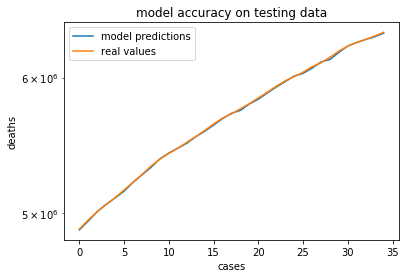

In [24]:
import matplotlib.pyplot as plt

predict = model.predict(X_test)
plt.semilogy(predict, label = "model predictions")
plt.semilogy(y_test , label = "real values")
plt.title('model accuracy on testing data')
plt.ylabel('deaths')
plt.xlabel('cases')
plt.legend()

In [29]:
from datetime import date
size = (2 , past  * 2)
finalInput = np.zeros(size)
temp = np.zeros(past * 2)
temp[:past] = inputs[-past:]
temp[past:] = outputs[-past:]
finalInput[0] = temp
finalInput[1] = temp
futurePrediction = model.predict(finalInput)
futurePrediction
futurePrediction = futurePrediction[0]
print("Prediction for tomorrow's national coronavirus cases : " + str(int(futurePrediction)))
print("Today's date : " + str(date.today()))

array([6407186.42709736, 6407186.42709736])

In [27]:
betterinputs = betterinputs[0:len(df)-past] 
betteroutputs = betteroutputs[0:len(df)-past]
futurePrediction

6407186.427097364